In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [159]:
prefixes = ['Control', 'Data Parallel', 'Execution', 'Memory', 'Store Intense']

In [160]:
# making dataframe
df1 = pd.read_csv("perf_microbench.csv")
X = df1["Benchmark"]
Y1 = df1["IPC"]
Y2 = df1["Cycles"]
Y3 = df1["Instructions"]
Y4 = df1["Seconds"]
Y5 = df1["IPS"]

df2 = pd.read_csv("gem5runs_microbench.csv")
X_2 = df2["Benchmark"]
Y1_2 = df2["IPC"]
Y2_2 = df2["Cycles"]
Y3_2 = df2["Instructions"]
Y4_2 = df2["Seconds"]
Y5_2 = df2["IPS"]

# Gives all rows in df2 where cycles > 1000000
# df2[(df2["Cycles"] > 1000000)]
# df2[(df2["Cycles"] > 1000000)]["IPS"]
# df2[(df2["Cycles"] > 1000000) & (df2["Seconds"] < 0.001)]
# plot(df2["Instructions"], df2["Seconds"])


In [161]:
def absoluteplot(stat, ylim=None):
    plt.figure(figsize=(8,4))
    data = {}
    data_sorted = {}
    i = 0
    j = 0
    label = stat


    for b, bench in enumerate(X):
        if stat == 'Cycles' or stat == 'Instructions':
            diff = ((df2[stat].iloc[b] - df1[stat].iloc[b]))/1000000
            label = 'Million ' + stat
        elif stat == 'IPS':
            diff = ((df2[stat].iloc[b] - df1[stat].iloc[b]))/1000000000
            label = 'B' + stat
        else:
            diff = (df2[stat].iloc[b] - df1[stat].iloc[b])
        data[bench] = diff
    
    keys = sorted(data, key=data.get)
    for r in keys:
        data_sorted[r] = [data[r]]

    # match a key from dictionary to an array of prefixes
    for k, v in data_sorted.items():
        for p in prefixes:
            if k.startswith(p[0]):
                data_sorted[k].append(prefixes.index(p))
    
    
    annot_offset_pos = 0
    annot_offset_neg = 0
    for i, (b, bench) in enumerate(data_sorted.items()):
        if ylim and data_sorted[b][0] < ylim[0]:
            plt.annotate(str(round(data_sorted[b][0], 1)), (i-1,ylim[0]+annot_offset_neg))
            annot_offset_neg -= ylim[0]/10.0
            # annotate the value to the graph
        elif ylim and data_sorted[b][0] > ylim[1]:
            plt.annotate(str(round(data_sorted[b][0], 1)), (i-1,ylim[1]+annot_offset_pos))
            annot_offset_pos -= ylim[0]/10.0
        plt.bar(i, data_sorted[b][0], color="C" + str(data_sorted[b][1]))

    
    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(data_sorted))), data_sorted, rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(label)
    plt.axhline(y=0)
    plt.title("Absolute difference gem5 compared to perf for " + label)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.ylim(ylim)
    plt.show()

In [162]:
def percentageplot(stat, ylim=None):
    plt.figure(figsize=(8,4))
    data = {}
    data_sorted = {}
    i = 0
    j = 0

    for b, bench in enumerate(X):
        diff = (df2[stat].iloc[b] - df1[stat].iloc[b])/df1[stat].iloc[b]
        data[bench] = diff*100
    
    keys = sorted(data, key=data.get)
    for r in keys:
        data_sorted[r] = [data[r]]

    # match a key from dictionary to an array of prefixes
    for k, v in data_sorted.items():
        for p in prefixes:
            if k.startswith(p[0]):
                data_sorted[k].append(prefixes.index(p))
    
    annot_offset_pos = 0
    annot_offset_neg = 0
    for b, bench in data_sorted.items(): 
        if ylim and data_sorted[b][0] > ylim[1]:
            plt.annotate(str(round(data_sorted[b][0], 1)), (i-1,ylim[1]+annot_offset_pos), fontsize = 10)
            annot_offset_pos -= ylim[1]/10
        elif ylim and data_sorted[b][0] < ylim[0]:
            plt.annotate(str(round(data_sorted[b][0], 1)), (i-1,ylim[0]+annot_offset_neg), fontsize = 10)
            annot_offset_neg -= ylim[0]/10
        plt.bar(i, data_sorted[b][0], color="C" + str(data_sorted[b][1]))
        i = i + 1
    
    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(data_sorted))), data_sorted, rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(f"Percentage difference in {stat}")
    plt.axhline(y=0)
    plt.title(f"{stat} in gem5 relative to perf")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.ylim(ylim)
    plt.show()

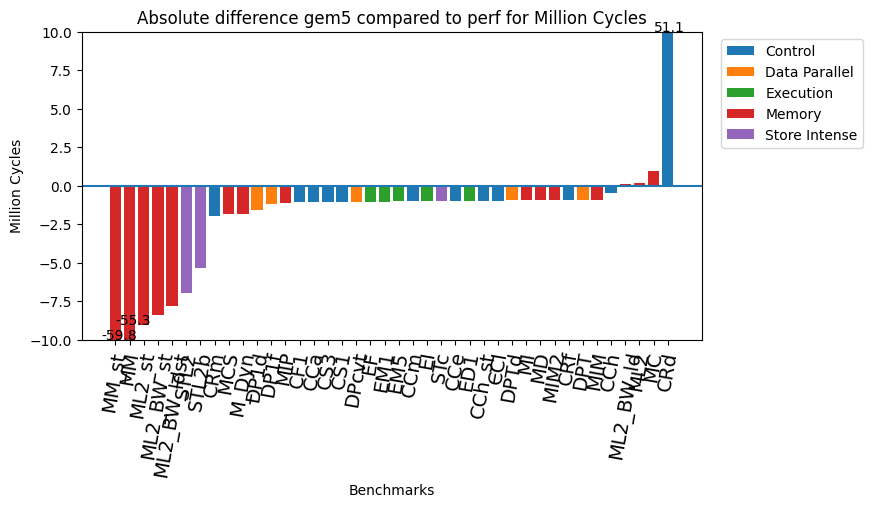

In [163]:
absoluteplot("Cycles", (-10,10))

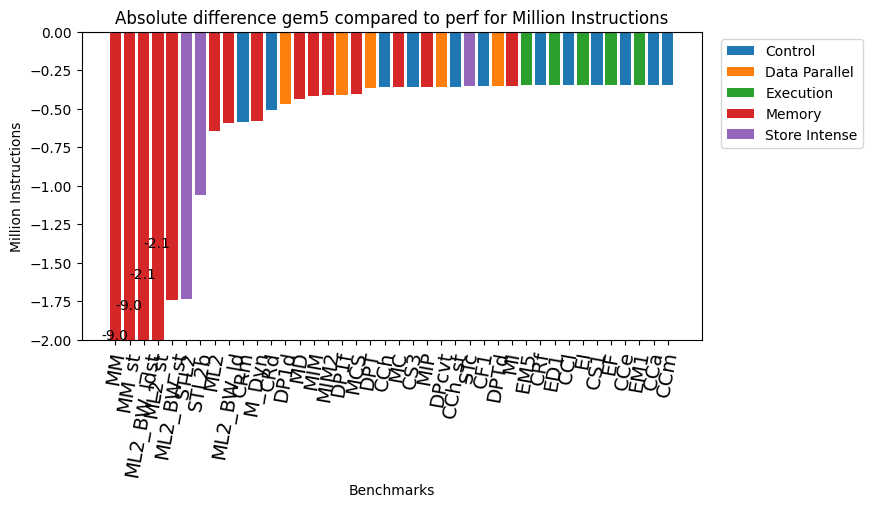

In [164]:
absoluteplot("Instructions", (-2,0))

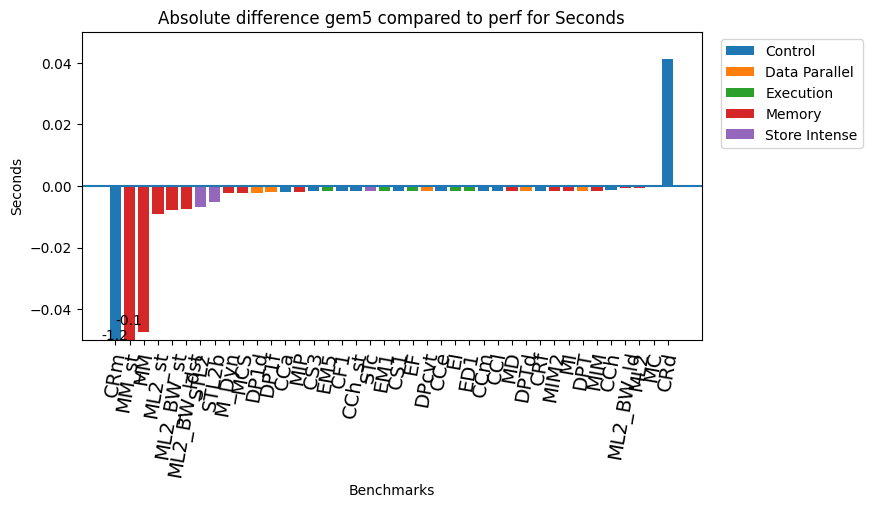

In [165]:
absoluteplot("Seconds", (-0.05,.05))

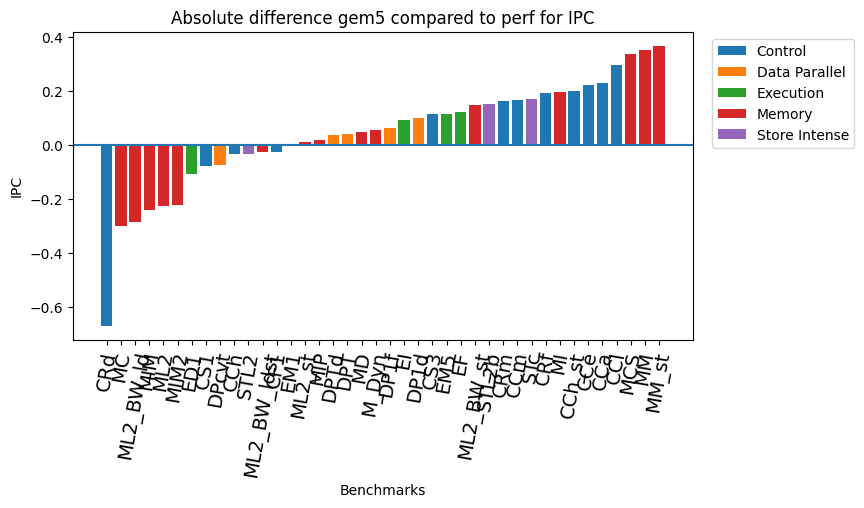

In [166]:
absoluteplot("IPC")

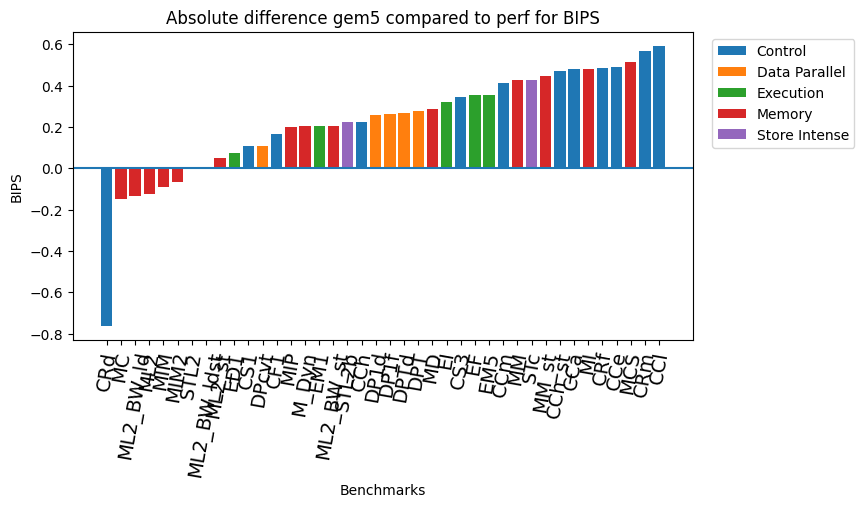

In [167]:
absoluteplot("IPS")

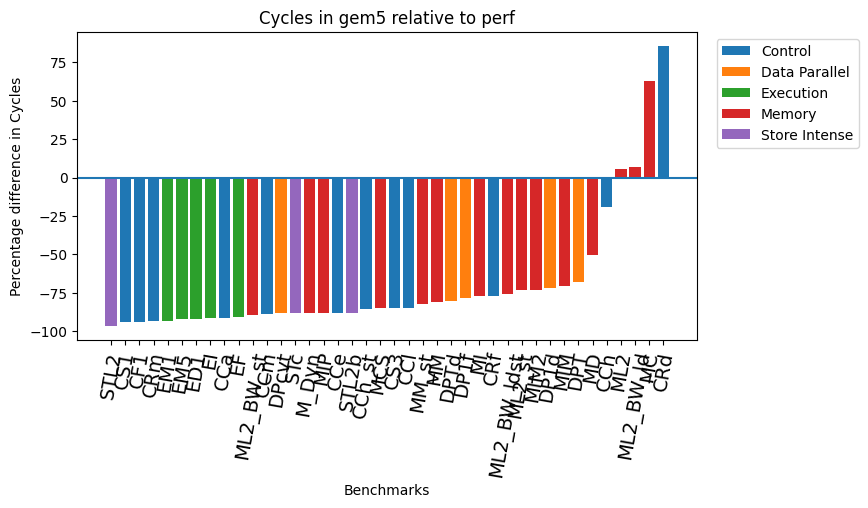

In [168]:
percentageplot("Cycles")

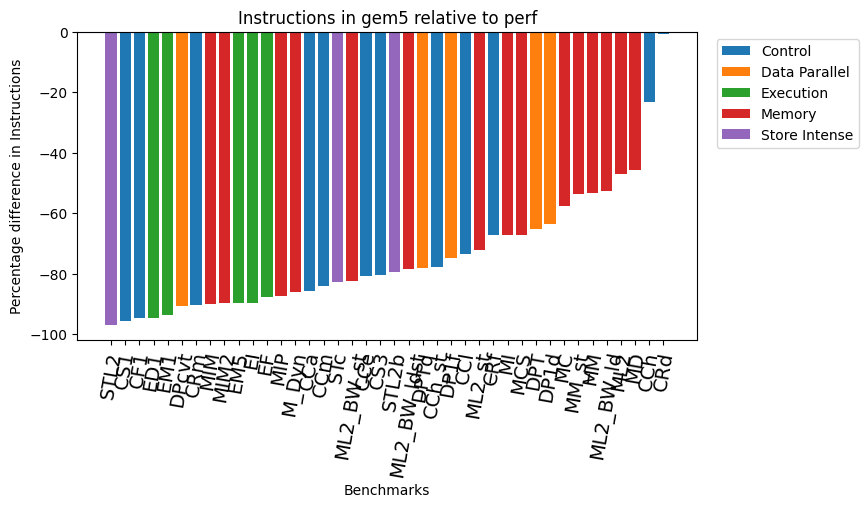

In [169]:
percentageplot("Instructions")

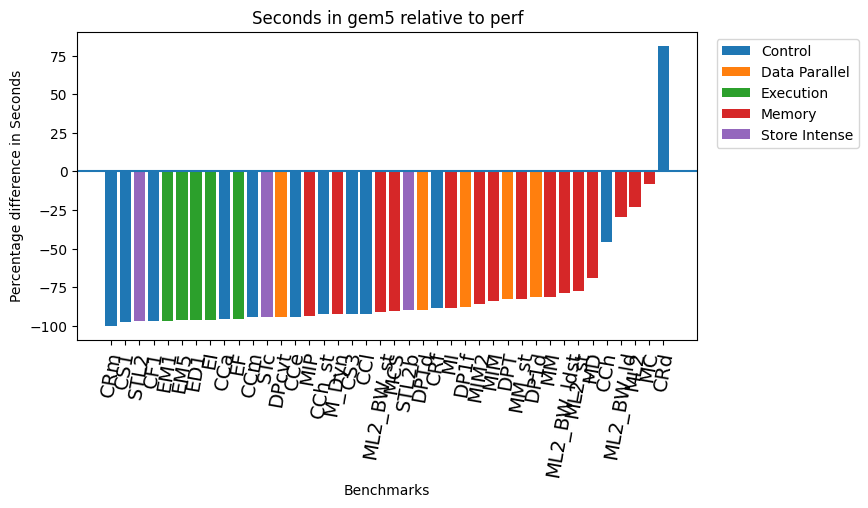

In [170]:
percentageplot("Seconds")

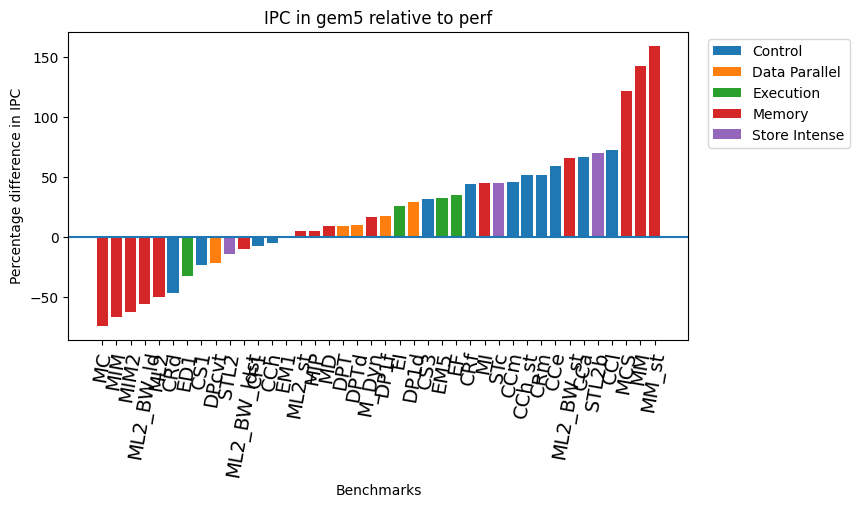

In [171]:
percentageplot("IPC")

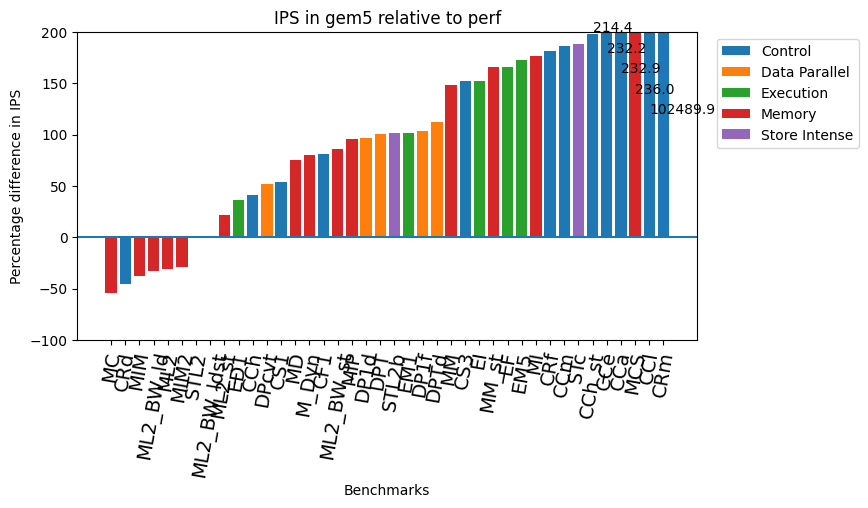

In [172]:
percentageplot("IPS", (-100,200))
